# Wildfire Smoke Impact on Health Outcomes.

## Objective
This analysis investigates the relationship between wildfire smoke exposure and health outcomes.
## Approach
1. **Data Integration**: Merged smoke impact data with health outcome data shifted by five years.
2. **Visualization**: Created comparative plots to visually explore the lagged relationships.
3. **Statistical Analysis**: Calculated Pearson correlation coefficients and p-values to quantify the strength and significance of lagged relationships.

## Key Insights
This lagged analysis provides critical insights into how health conditions such as COPD, hypertension, and others are influenced by wildfire smoke over an extended period, helping to inform public health strategies and policies.


### Importing Libraries
In this code block, we are importing the necessary libraries for data processing, visualization, and statistical analysis:

- **`pandas`**: For handling and analyzing structured data, particularly in tabular form.
- **`matplotlib.pyplot`**: For creating static visualizations like line plots, scatter plots, and histograms.
- **`seaborn`**: A Python visualization library based on `matplotlib` that provides high-level functions for creating informative and attractive statistical graphics.
- **`scipy.stats.pearsonr`**: For calculating Pearson correlation coefficients, allowing us to quantify the strength and direction of relationships between variables.

These libraries will be essential throughout the notebook for cleaning, visualizing, and analyzing the data.


In [67]:
# Importing essential libraries for data manipulation, visualization, and statistical analysis.
import pandas as pd  # Data handling and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # Enhanced statistical graphics
from scipy.stats import pearsonr  # For computing Pearson correlation coefficients

### Reading and Preprocessing Health Data
This code block performs the following operations to prepare the health datasets for analysis:

1. **File List Definition**: A list of CSV filenames is provided, each representing a specific health condition (e.g., `birth_defects.csv`, `COPD.csv`).
2. **Reading Files into DataFrames**:
   - Each file is read using `pandas.read_csv()` and stored as a DataFrame.
   - The 'Year' column is set as the index for easier time-based operations later.
3. **Renaming Columns**:
   - Each dataset's primary numeric column (originally labeled 'Number') is renamed using the file name (e.g., `birth_defects` for `birth_defects.csv`).
4. **Storing DataFrames in a Dictionary**:
   - The cleaned DataFrames are stored in a dictionary (`dfs`) with keys corresponding to the dataset's disease name, allowing for flexible data access.

This step ensures each dataset is processed and ready for merging or further analysis.


In [68]:
# List of files containing health data for different conditions
files = ['birth_defects.csv', 'COPD.csv', 'hypertension.csv', 'lung_cancer.csv', 'heart_diseases.csv', 'total.csv']

# Dictionary to store processed DataFrames
dfs = {}

# Loop through each file
for file in files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv("../data/" + file)
    
    # Set the 'Year' column as the index for time-based operations
    df.set_index('Year', inplace=True)
    
    # Extract the disease name from the file name and rename the 'Number' column
    disease_name = file.split('.')[0]  # Remove file extension to get the disease name
    df.rename(columns={'Number': disease_name}, inplace=True)
    
    # Store the processed DataFrame in the dictionary with the disease name as the key
    dfs[disease_name] = df


### Combining Health DataFrames
This code block consolidates all individual health condition datasets into a single DataFrame for streamlined analysis.

1. **Concatenate DataFrames**:
   - `pd.concat(dfs.values(), axis=1)` merges all DataFrames stored in the `dfs` dictionary along their columns, aligning them by the index ('Year').

2. **Handle Missing Values**:
   - `fillna(0)` replaces any missing values with `0`, assuming that missing data corresponds to no recorded cases for that year.

3. **Reset Index** (Optional):
   - Converts the 'Year' index back into a regular column using `reset_index`, making the data easier to inspect and manipulate if needed.

4. **Display the Combined DataFrame**:
   - `print(health_df)` outputs the merged DataFrame to verify the structure and contents.

This step ensures that all health data is combined and ready for further analysis.


In [69]:
# Combine all individual health condition DataFrames into a single DataFrame
health_df = pd.concat(dfs.values(), axis=1)

# Replace missing values with 0 to handle gaps in the data
health_df.fillna(0, inplace=True)

# Reset the index to make 'Year' a regular column (optional for convenience)
health_df.reset_index(inplace=True)

# Display the combined DataFrame for verification
print(health_df)


    Year birth_defects  COPD hypertension  lung_cancer  heart_diseases  total
0   1980            20    38            6          121             683  2,090
1   1981            22    55           12          113             745  2,072
2   1982            16    59            7          140             713  2,082
3   1983            16    71         ****          118             714  2,058
4   1984            13    58            6          137             686  1,971
5   1985            21    58            6          131             789  2,098
6   1986            15    60           10          138             759  2,061
7   1987            22    56            6          141             760  2,123
8   1988            21    65            6          140             792  2,217
9   1989            17    54            8          154             833  2,292
10  1990            18    68            7          137             754  2,150
11  1991            16    72            6          150          

### Combining Datasets: Smoke Impact and Health Data

In this step, the smoke impact dataset (`smoke_df`) is loaded and prepared for merging with the health dataset (`health_df`).

1. **Data Cleaning**:
   - Replaced placeholder values (`****`) in `health_df` with `NA` for easier handling of missing data.

2. **Standardizing the 'Year' Column**:
   - Converted the 'Year' column in both datasets to a consistent `datetime` format to facilitate accurate merging.

3. **Merging**:
   - Combined the two datasets using an inner join on the 'Year' column. This ensures that only the years available in both datasets are retained.

The merged dataset (`combined_df`) provides a consolidated view of smoke impact and health outcomes for analysis.

In [81]:
# Load the smoke impact dataset
smoke_df = pd.read_csv("../data/smoke_impact.csv")

# Replace placeholders ('****') in the health dataset with pandas' Not Available (NA) values
health_df.replace('****', pd.NA, inplace=True)

# Convert the 'Year' column in both datasets to datetime format for consistency
smoke_df['Year'] = pd.to_datetime(smoke_df['Year'], format='%Y')
health_df['Year'] = pd.to_datetime(health_df['Year'], format='%Y')

# Merge the smoke impact and health datasets on the 'Year' column
# Use an inner join to retain only matching years in both datasets
combined_df = pd.merge(smoke_df, health_df, on='Year', how='inner')

# Print the combined dataset for verification
print(combined_df)


### Data Cleaning: Handling Missing Values and Ensuring Consistent Data Types

1. **Replace Placeholder Values**:
   - Replaced any remaining placeholder values (`****`) in the dataset with `NA` to handle missing data appropriately.

2. **Remove Rows with Missing Values**:
   - Dropped rows where any of the key columns (`birth_defects`, `COPD`, `hypertension`, `lung_cancer`, `Total_Smoke_Impact`) have `NA` values to ensure clean and complete data for analysis.

3. **Ensure Proper Data Types**:
   - Standardized the 'Year' column format to `datetime`. This ensures consistency and compatibility for temporal analyses and visualizations.


In [72]:

# Replace placeholder values (****) with NA to handle missing data
combined_df.replace('****', pd.NA, inplace=True)

# Drop rows with missing values in key columns to ensure a clean dataset
combined_df.dropna(subset=['birth_defects', 'COPD', 'hypertension', 'lung_cancer', 'Total_Smoke_Impact'], inplace=True)

# Convert the 'Year' column to datetime format for consistency in time-based analysis
combined_df['Year'] = pd.to_datetime(combined_df['Year'], format='%Y')



### Visualizing Trends in Health Outcomes and Smoke Impact

**Objective**: To explore the temporal relationships between smoke impact and various health outcomes.

1. **Figure and Subplots**:
   - Created a figure with 6 subplots arranged in a 3x2 grid. Each subplot compares a specific health outcome (e.g., COPD, hypertension) against smoke impact over the years.

2. **Reusable Function**:
   - Developed a reusable `plot_dual_lines` function to:
     - Plot two lines (one for the health outcome and one for smoke impact) on the same axis.
     - Format the plot with a title, labeled axes, gridlines, and a legend for clarity.

3. **Customization**:
   - Improved aesthetics with:
     - Clear and descriptive subplot titles.
     - Rotated x-axis labels for better readability.
     - Gridlines to help interpret trends.
     - Adjusted line styles and colors to distinguish between health outcomes and smoke impact.

4. **Layout and Spacing**:
   - Used `tight_layout` and `subplots_adjust` to ensure proper spacing between plots and prevent overlap with the overarching title.

**Output**: The resulting visualizations allow for a clear comparison of trends in health outcomes and smoke impact over the years, highlighting potential relationships for further analysis.


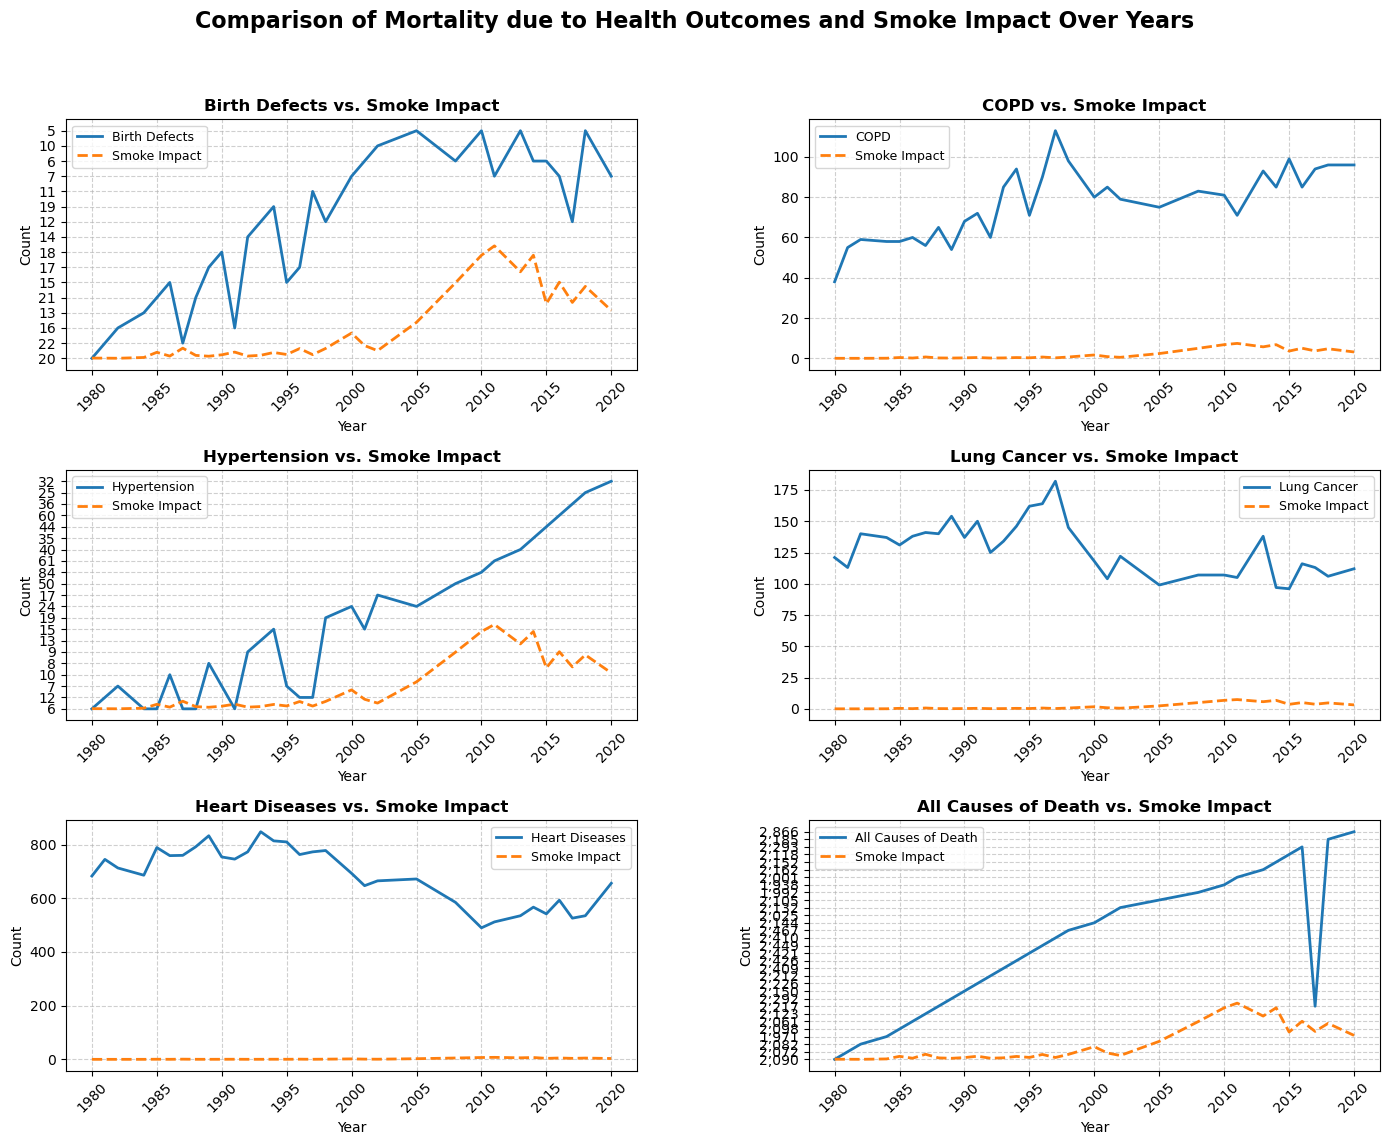

In [73]:
# Create a figure with subplots and set an overarching title with improved aesthetics
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Comparison of Mortality due to Health Outcomes and Smoke Impact Over Years', fontsize=16, fontweight='bold')

# Define a reusable function to plot dual lines for health outcomes and smoke impact
def plot_dual_lines(ax, df, x, y1, y2, label1, label2):
    # Drop rows with missing values for the two columns being plotted
    df = df.dropna(subset=[y1, y2])
    
    # Plot the health outcome line
    ax.plot(df[x], df[y1], label=label1, color='#1f77b4', linewidth=2)
    # Plot the smoke impact line
    ax.plot(df[x], df[y2], label=label2, linestyle='--', color='#ff7f0e', linewidth=2)
    
    # Add title and axis labels for the subplot
    ax.set_title(f'{label1} vs. Smoke Impact', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
    # Add a grid for easier visualization of trends
    ax.grid(True, linestyle='--', alpha=0.6)
    # Add a legend to distinguish the two lines
    ax.legend(fontsize=9)

# Plot each health outcome against smoke impact in a 3x2 grid
plot_dual_lines(axs[0, 0], combined_df, 'Year', 'birth_defects', 'Total_Smoke_Impact', 'Birth Defects', 'Smoke Impact')
plot_dual_lines(axs[0, 1], combined_df, 'Year', 'COPD', 'Total_Smoke_Impact', 'COPD', 'Smoke Impact')
plot_dual_lines(axs[1, 0], combined_df, 'Year', 'hypertension', 'Total_Smoke_Impact', 'Hypertension', 'Smoke Impact')
plot_dual_lines(axs[1, 1], combined_df, 'Year', 'lung_cancer', 'Total_Smoke_Impact', 'Lung Cancer', 'Smoke Impact')
plot_dual_lines(axs[2, 0], combined_df, 'Year', 'heart_diseases', 'Total_Smoke_Impact', 'Heart Diseases', 'Smoke Impact')
plot_dual_lines(axs[2, 1], combined_df, 'Year', 'total', 'Total_Smoke_Impact', 'All Causes of Death', 'Smoke Impact')

# Adjust the layout to ensure spacing between plots and the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ensure the title doesn't overlap with the plots
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Add spacing between rows and columns of subplots

# Display the final plots
plt.show()



### Calculating Correlation Between Health Outcomes and Smoke Impact

**Objective**: Quantify the strength and significance of the relationship between wildfire smoke impact and various health outcomes.

1. **Health Outcomes and Smoke Impact**:
   - Selected a list of health outcomes (`birth_defects`, `COPD`, `hypertension`, `lung_cancer`, `heart_diseases`) to analyze against the `Total_Smoke_Impact`.

2. **Data Preparation**:
   - For each health outcome:
     - Dropped rows with missing values to ensure clean and reliable data for correlation analysis.
     - Converted health outcome data to numeric to handle potential non-numeric values.

3. **Correlation Calculation**:
   - Used the Pearson correlation method to compute:
     - **Correlation Coefficient**: Measures the strength and direction of the relationship.
     - **P-value**: Indicates the statistical significance of the correlation.

4. **Results Storage**:
   - Stored the correlation coefficient and p-value for each health outcome in a dictionary (`correlation_results`) for easy retrieval and reporting.

**Outcome**: The computed correlations help identify which health outcomes are most strongly influenced by wildfire smoke impact, paving the way for deeper insights and interpretations.


In [74]:
# Define the health outcomes and the smoke impact column for correlation analysis
health_outcomes = ['birth_defects', 'COPD', 'hypertension', 'lung_cancer', 'heart_diseases']  # List of health outcomes
smoke_impact = 'Total_Smoke_Impact'  # Column representing the smoke impact

# Initialize an empty dictionary to store correlation results
correlation_results = {}

# Loop through each health outcome to calculate correlation with smoke impact
for outcome in health_outcomes:
    # Drop rows with missing values for the current health outcome and smoke impact
    clean_data = combined_df[[outcome, smoke_impact]].dropna()
    # Convert the health outcome column to numeric to handle any potential non-numeric values
    clean_data[outcome] = pd.to_numeric(clean_data[outcome], errors='coerce')

    # Calculate Pearson correlation coefficient and p-value
    corr_coefficient, p_value = pearsonr(clean_data[outcome], clean_data[smoke_impact])

    # Store the results (correlation coefficient and p-value) in the dictionary
    correlation_results[outcome] = (corr_coefficient, p_value)



### Displaying Correlation Results

**Objective**: Present the computed correlation coefficients and p-values for each health outcome to interpret the strength and significance of their relationships with smoke impact.

1. **Correlation Metrics**:
   - **Coefficient**: Indicates the strength and direction of the relationship (positive or negative).
   - **P-value**: Shows whether the relationship is statistically significant.

2. **Output**:
   - Iterates through the `correlation_results` dictionary to print the correlation metrics for each health outcome.
   - This allows for quick identification of significant and impactful relationships between wildfire smoke and health outcomes.

**Purpose**: This step communicates the statistical findings effectively and sets the stage for further analysis or visualizations.


In [75]:
# Loop through the stored correlation results to display them
for outcome, stats in correlation_results.items():
    # Print the correlation coefficient and p-value for each health outcome
    print(f"Correlation between {outcome} and smoke impact: Coefficient={stats[0]}, P-value={stats[1]}")


Correlation between birth_defects and smoke impact: Coefficient=-0.733859439259402, P-value=1.758103833756716e-06
Correlation between COPD and smoke impact: Coefficient=0.39897584654547863, P-value=0.023696812654485193
Correlation between hypertension and smoke impact: Coefficient=0.9025226939068998, P-value=1.6778878844278367e-12
Correlation between lung_cancer and smoke impact: Coefficient=-0.6107385559158233, P-value=0.00020529818965810145
Correlation between heart_diseases and smoke impact: Coefficient=-0.8775884545758619, P-value=4.3037407437674106e-11


### Constructing the Correlation DataFrame

**Objective**: Create a DataFrame from the calculated correlation coefficients to facilitate visualization using a heatmap.

1. **Data Preparation**:
   - A dictionary is used to store the health outcomes and their corresponding correlation coefficients.
   - Only the correlation coefficients are considered here, as they will form the basis of the heatmap visualization.

2. **DataFrame Construction**:
   - The dictionary is converted into a pandas DataFrame.
   - `Health Outcome` is set as the index to make the DataFrame more intuitive and easier to interpret.

3. **Transpose for Heatmap**:
   - The DataFrame is transposed to align rows and columns for heatmap compatibility.
   - This ensures the heatmap displays health outcomes correctly along one axis and correlation coefficients visually.

**Outcome**: The resulting `heatmap_data` is ready for input into a heatmap visualization.


In [76]:
# Initialize a dictionary to store data for constructing the correlation DataFrame
data = {
    'Health Outcome': [],  # List to store health outcome names
    'Correlation Coefficient': []  # List to store corresponding correlation coefficients
}

# Loop through the correlation results to populate the dictionary
for outcome, stats in correlation_results.items():
    data['Health Outcome'].append(outcome)  # Add health outcome name
    data['Correlation Coefficient'].append(stats[0])  # Add only the correlation coefficient (not p-value)

# Convert the dictionary to a pandas DataFrame
correlation_df = pd.DataFrame(data)

# Set 'Health Outcome' as the index for better readability and compatibility with the heatmap
correlation_df.set_index('Health Outcome', inplace=True)

# Transpose the DataFrame to prepare it for use in a heatmap (ensures correct orientation)
heatmap_data = correlation_df.T



### Plotting the Heatmap

**Objective**: Visualize the correlation coefficients between smoke impact and various health outcomes using a heatmap.

1. **Figure Initialization**:
   - A figure of size 8x4 inches is created for the heatmap.

2. **Heatmap Properties**:
   - The `heatmap` function from seaborn is used to create the visualization.
   - Key features:
     - **Data**: The transposed `heatmap_data` DataFrame.
     - **Annotations**: Numerical correlation coefficients are displayed directly on the heatmap.
     - **Colormap**: The `coolwarm` colormap is chosen to highlight positive (red) and negative (blue) correlations.
     - **Centering**: The color gradient is centered at zero to emphasize neutral correlations.
     - **Formatting**: Values are displayed with two decimal points for clarity.
     - **Color Bar**: A reference bar is included for interpreting the color scale.

3. **Layout and Title**:
   - A title is added to contextualize the visualization.
   - `tight_layout` ensures that all elements are properly spaced within the figure.

**Outcome**: The heatmap visually summarizes the strength and direction of the relationships between smoke impact and health outcomes, providing an intuitive and interpretable representation.


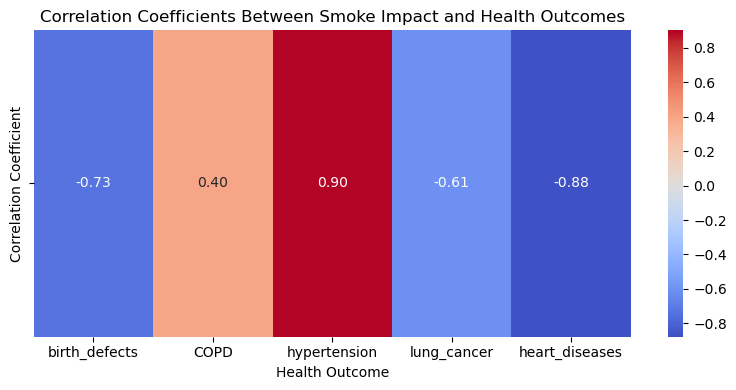

In [77]:
# Create a new figure for the heatmap
plt.figure(figsize=(8, 4))  # Set the figure size to 8x4 inches

# Plot a heatmap of the correlation data
sns.heatmap(
    heatmap_data,  # Data source for the heatmap
    annot=True,  # Display numerical values on the heatmap
    cmap='coolwarm',  # Set the colormap to visually distinguish positive and negative correlations
    center=0,  # Center the color gradient at zero for balanced visualization
    fmt=".2f",  # Format the numerical values to two decimal places
    cbar=True  # Include a color bar for reference
)

# Add a title to the heatmap for context
plt.title('Correlation Coefficients Between Smoke Impact and Health Outcomes')

# Adjust layout to ensure all elements fit well within the figure
plt.tight_layout()

# Display the heatmap
plt.show()


### COPD and Smoke Impact:

- Coefficient: 0.39897584654547863
- P-value: 0.023696812654485193
- Interpretation: A moderate positive correlation exists between smoke impact and COPD cases. This indicates that as smoke exposure increases, COPD cases also tend to increase. The p-value is below 0.05, which makes this finding statistically significant, although the relationship is not as strong as in some other health outcomes.
- Direct Impact: Smoke from wildfires contains particulate matter and chemicals that can exacerbate respiratory conditions like COPD, leading to more cases or more severe symptoms being reported.

### Hypertension and Smoke Impact:

- Coefficient: 0.9025226939068998
- P-value: 1.6778878844278367e-12
I- nterpretation: There is a very strong positive correlation between smoke impact and hypertension. This is the strongest positive relationship observed in your analysis, suggesting that higher levels of smoke exposure are closely linked with increases in hypertension cases. The extremely low p-value confirms the statistical significance of this correlation.
- Possible Reasons:
    - Physiological Stress Response: Smoke exposure can lead to stress responses, including increased blood pressure. Persistent exposure to poor air quality may exacerbate hypertension.
    - Indirect Health Behaviors: Smoky conditions might reduce outdoor activities, increasing sedentary lifestyles that contribute to hypertension.


### Creating a Lagged DataFrame for Health Analysis

**Objective**: Explore the potential lagged effects of wildfire smoke impact on health outcomes by introducing a five-year time shift in the health data.

1. **Lagged Health Data**:
   - A copy of the `health_df` DataFrame is created to preserve the original dataset.
   - The `Year` column in the copy is shifted forward by 5 years using `pd.DateOffset`.

2. **Data Merging**:
   - The lagged health data is merged with the smoke impact data on the `Year` column.
   - An inner join is used to retain only the years that are common to both datasets after the shift.

**Outcome**: The resulting `lagged_combined_df` allows for an analysis of how wildfire smoke impacts health outcomes with a potential time delay of five years.


In [78]:
# Create a new DataFrame for lagged health data analysis
lagged_health_df = health_df.copy()  # Create a copy of the original health data to avoid modifying it directly

# Shift health data forward by five years to analyze potential lagged effects
lagged_health_df['Year'] = lagged_health_df['Year'] + pd.DateOffset(years=5)

# Merge the shifted health data with smoke impact data
lagged_combined_df = pd.merge(
    smoke_df,  # Smoke impact data
    lagged_health_df,  # Lagged health data
    on='Year',  # Merge on the 'Year' column to align datasets
    how='inner'  # Use an inner join to keep only the years present in both datasets
)



### Lagged Data Analysis Visualization

**Objective**: Compare the lagged health outcomes with wildfire smoke impact over the years to identify delayed correlations.

1. **Subplot Layout**:
   - A grid of 3x2 subplots is created to visualize each health outcome separately against smoke impact.

2. **Function Definition**:
   - A reusable function `plot_dual_lines_with_lag` is defined to:
     - Handle NaN values.
     - Plot health outcomes and smoke impact on the same axes with distinct markers and colors.
     - Add appropriate titles, axis labels, and legends.

3. **Plotting**:
   - Each health outcome (e.g., birth defects, COPD) is plotted against smoke impact using the lagged dataset (`lagged_combined_df`).
   - The year column (`Year`) is used as the x-axis for all plots.

4. **Adjustments**:
   - The layout is fine-tuned with `tight_layout` to ensure proper spacing.
   - A title for the entire figure is added for better context.

**Outcome**: A clear visualization of how wildfire smoke impact correlates with health outcomes after a five-year lag, facilitating interpretation of potential delayed effects.


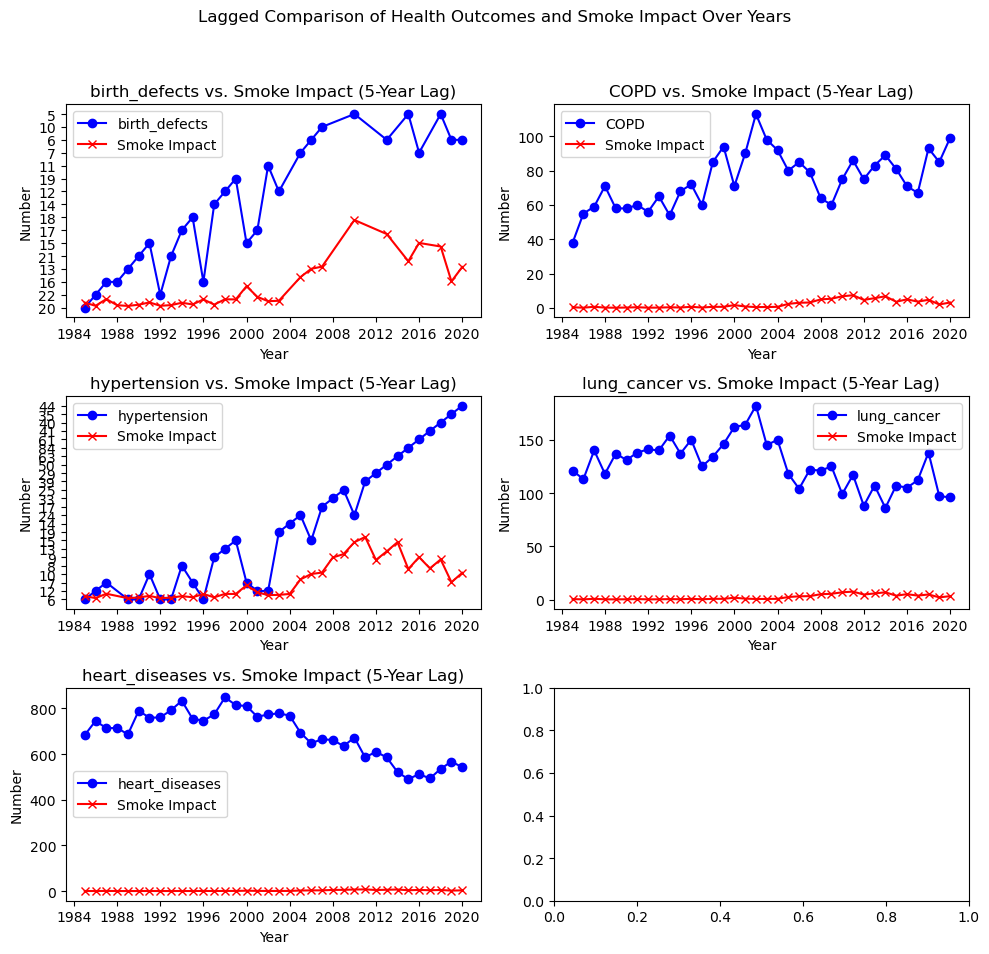

In [79]:
# Create a figure with subplots for visualizing lagged data analysis
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Define a 3x2 grid for subplots
fig.suptitle('Lagged Comparison of Health Outcomes and Smoke Impact Over Years')  # Add a title for the entire figure

# Define a generic function to plot dual lines with lagged data
def plot_dual_lines_with_lag(ax, df, x, y1, y2, label1, label2):
    # Remove rows with NaN values in the selected columns
    df = df.dropna(subset=[y1, y2])
    
    # Plot the health outcome data
    ax.plot(df[x], df[y1], label=label1, marker='o', color='b')  # Blue markers for health outcomes
    # Plot the smoke impact data
    ax.plot(df[x], df[y2], label=label2, marker='x', color='r')  # Red markers for smoke impact
    
    # Add titles, labels, and legends for the subplot
    ax.set_title(f'{label1} vs. Smoke Impact (5-Year Lag)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number')
    ax.legend()

# Define the list of health outcomes to plot
outcomes = ['birth_defects', 'COPD', 'hypertension', 'lung_cancer', 'heart_diseases']  # Ensure column names match your DataFrame

# Iterate through outcomes and plot each one
for i, outcome in enumerate(outcomes):
    plot_dual_lines_with_lag(
        axs[i // 2, i % 2],  # Select subplot based on index
        lagged_combined_df,  # Use the lagged dataset
        'Year',  # X-axis column
        outcome,  # Y-axis column for health outcome
        'Total_Smoke_Impact',  # Y-axis column for smoke impact
        outcome,  # Label for health outcome
        'Smoke Impact'  # Label for smoke impact
    )

# Adjust layout and spacing to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()




### Lagged Correlation Analysis

**Objective**: Quantify the relationship between wildfire smoke impact and health outcomes with a five-year lag.

1. **Data Preparation**:
   - For each health outcome, rows with missing values (`NaN`) in the lagged dataset are excluded.
   - The outcome column is converted to numeric to handle any non-numeric values.

2. **Correlation Calculation**:
   - Pearson correlation coefficient and p-value are computed for each health outcome against the lagged smoke impact (`Total_Smoke_Impact`).
   - Results are stored in a dictionary for further analysis.

3. **Output**:
   - The computed correlation coefficients and p-values are printed for each health outcome, highlighting the strength and statistical significance of the lagged relationships.

**Outcome**: This analysis provides insight into how health outcomes are affected by wildfire smoke exposure after a delay, helping to uncover long-term impacts.


In [80]:
# Initialize a dictionary to store correlation results for lagged data
correlation_results_lagged = {}

# Loop through each health outcome to compute correlation with lagged smoke impact
for outcome in outcomes:
    # Drop rows with NaN values for the current health outcome and smoke impact
    clean_data = lagged_combined_df[[outcome, 'Total_Smoke_Impact']].dropna()
    
    # Ensure the health outcome column is numeric, handling any conversion issues
    clean_data[outcome] = pd.to_numeric(clean_data[outcome], errors='coerce')
    
    # Check if the cleaned data is not empty before calculating correlation
    if not clean_data.empty:
        # Calculate Pearson correlation coefficient and p-value
        corr_coefficient, p_value = pearsonr(clean_data[outcome], clean_data['Total_Smoke_Impact'])
        # Store the results in the dictionary
        correlation_results_lagged[outcome] = (corr_coefficient, p_value)

# Print the lagged correlation results in a readable format
for outcome, (coeff, pval) in correlation_results_lagged.items():
    print(f"Lagged Correlation between {outcome} and smoke impact: Coefficient={coeff}, P-value={pval}")


Lagged Correlation between birth_defects and smoke impact: Coefficient=-0.8056010644817949, P-value=1.349283809650554e-07
Lagged Correlation between COPD and smoke impact: Coefficient=0.25044980635854597, P-value=0.14068034665648022
Lagged Correlation between hypertension and smoke impact: Coefficient=0.7305290420190265, P-value=6.293397191790924e-07
Lagged Correlation between lung_cancer and smoke impact: Coefficient=-0.6194508550318603, P-value=5.617847220472656e-05
Lagged Correlation between heart_diseases and smoke impact: Coefficient=-0.7467672431722863, P-value=1.692539041503677e-07


### Lagged Mortality Rates and Smoke Impact
Intuition: The decrease in correlation strength for COPD and hypertension, when considering a five-year lag, could imply that the immediate effects of smoke exposure are more critical for these conditions. Alternatively, it could suggest that the response mechanisms (both physiological and healthcare-driven) may take time to manifest in data.